# User params

In [10]:
max_samples = 1_000

# Outlier detection with PyOD


In [11]:

import os, sys
sys.path.append(os.path.abspath('../src'))
from src.config import BASE_PATH_DATA, PATH_PROJECT
os.chdir(PATH_PROJECT)

In [12]:
import numpy as np
from src.utils.io.io import load_dataframe
from src.tasks.outliers import outlier_prediction
from src.config import BASE_PATH_DATA

# load data
file_path_test_enriched = os.path.join(BASE_PATH_DATA, 'processed', f'df_test_enriched.parquet')
test_df_enriched = load_dataframe(file_path_test_enriched)

file_path_train_encoded = os.path.join(BASE_PATH_DATA, 'processed', f'df_train_encoded.parquet')
file_path_test_encoded = os.path.join(BASE_PATH_DATA, 'processed', f'df_test_encoded.parquet')
train_df_encoded = load_dataframe(file_path_train_encoded)
test_df_encoded = load_dataframe(file_path_test_encoded)

# train and inference
outliers_train, scores_train = outlier_prediction(train_df_encoded, training=True)
outliers_test, scores_test = outlier_prediction(test_df_encoded, training=False) 

# categorize samples
train_scores_inliers = scores_train[outliers_train==0]
train_scores_outliers = scores_train[outliers_train==1]

test_scores_inliers = scores_test[outliers_test==0]
test_scores_outliers = scores_test[outliers_test==1]

# Calculate average outlier scores for train and test sets
average_score_inlier_train = np.mean(train_scores_inliers)
average_score_outlier_train = np.mean(train_scores_outliers)

average_score_inlier_test = np.mean(test_scores_inliers)
average_score_outlier_test = np.mean(test_scores_outliers)


2024-08-05 16:45:48,413 - src.config - DEBUG - calling load_dataframe
2024-08-05 16:45:48,413 - src.config - INFO - Current working directory: C:\Users\alexi\WORKSPACE\interview_abwaab\ReviewOutliers
2024-08-05 16:45:48,413 - src.config - ERROR - File not found: C:\Users\alexi\WORKSPACE\interview_abwaab\ReviewOutliers\data\processed\test_enriched.parquet
2024-08-05 16:45:48,413 - src.config - INFO - Current working directory: C:\Users\alexi\WORKSPACE\interview_abwaab\ReviewOutliers


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\alexi\\WORKSPACE\\interview_abwaab\\ReviewOutliers\\data\\processed\\test_enriched.parquet'

# Samples

In [ ]:
test_df_sorted.columns

Index(['rating', 'title_review', 'text', 'images_review', 'asin',
       'parent_asin', 'user_id', 'timestamp', 'helpful_vote',
       'verified_purchase', 'main_category', 'title_metadata',
       'average_rating', 'rating_number', 'features', 'description', 'price',
       'images_metadata', 'videos', 'store', 'categories', 'details',
       'bought_together', 'subtitle', 'author', 'scores'],
      dtype='object')

In [ ]:
# add the score to the dataframe and sort it
test_df_enriched["scores"] = scores_test
test_df_sorted = test_df_enriched.sort_values(by='scores', ascending=False)

# show top 10 rows
display(test_df_sorted[col_to_look].head(5))

,rating,title_review,text,images_review,timestamp,helpful_vote,verified_purchase,main_category,title_metadata,average_rating,rating_number,features,description,price,images_metadata,videos,store,categories,details,scores
6062,1.0,Don’t buy!!!,I got it went to use this item $25 gift card a...,[],1591832688712,6,True,Gift Cards,Visa $25 Gift Card (plus $3.95 Purchase Fee),4.8,22460,[This card is non-reloadable. No expiration of...,[],28.95,{'hi_res': ['https://m.media-amazon.com/images...,{'title': ['Visa Gift Cards: Digital Code vs P...,Visa,"[Gift Cards, Gift Card Categories, Specialty C...","{""Is Discontinued By Manufacturer"": ""No"", ""Pac...",7.666449
3433,1.0,Hugely Disappointing Gift,Hugely disappointing gift.<br /><br />I'm not ...,[],1451256080000,0,False,Gift Cards,Staples Holiday Gift Card $25,3.4,4,[Staples Gift Cards - Giving the perfect gift ...,[Giving the perfect gift has never been easier...,None,"{'hi_res': [None], 'large': ['https://m.media-...","{'title': [], 'url': [], 'user_id': []}",STAPLES,"[Gift Cards, Holiday Gift Cards]","{""Package Dimensions"": ""4 x 3 x 0.06 inches; 0...",7.666449
7537,1.0,Disapointing,I ordered 2 $50 gift cards. The order status s...,[],1390376009000,1,True,Gift Cards,Amazon.com Gift Card in a Santa Tin (Ho! Ho! H...,4.9,6998,[Gift Card is nested inside a specialty gift b...,[Amazon.com Gift Cards are the perfect way to ...,None,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",Amazon,"[Gift Cards, Gift Card Recipients, For Him]","{""Package Dimensions"": ""5 x 4 x 1.2 inches; 1....",7.666449
13194,1.0,Beware of buying Amazon Gift Cards as Gifts!,I am so upset with Amazon..ordered a gift card...,[],1578794632913,0,True,Gift Cards,Amazon.com Gift Card in a Holiday Pop-Up Box,4.9,73333,"[Gift Card is affixed inside a gift box, Gift ...",[Amazon.com Gift Cards are the perfect way to ...,50.0,{'hi_res': ['https://m.media-amazon.com/images...,{'title': ['Boxed Gift Card! Awesome last Minu...,Amazon,"[Gift Cards, Occasions, Christmas]","{""Package Dimensions"": ""4.65 x 4.17 x 1.42 inc...",7.666449
20013,5.0,can always count on amazon for a last minute g...,"Thanks Amazon, your stuff is always the best, ...",[],1357103551000,16,True,Gift Cards,Amazon.com Gift Cards,4.7,925,[Amazon.com Gift cards never expire and carry ...,[Amazon.com Gift Cards are the perfect way to ...,None,"{'hi_res': [None, 'https://m.media-amazon.com/...","{'title': [], 'url': [], 'user_id': []}",Amazon,"[Gift Cards, Gift Cards]","{""Product Dimensions"": ""7.63 x 5.25 x 0.1 inch...",7.666449


# Visualizations

2024-08-05 15:40:54,133 - matplotlib - DEBUG - matplotlib data path: c:\Users\alexi\AppData\Local\pypoetry\Cache\virtualenvs\reviewoutliers-SwZO3ms--py3.12\Lib\site-packages\matplotlib\mpl-data
2024-08-05 15:40:54,135 - matplotlib - DEBUG - CONFIGDIR=C:\Users\alexi\.matplotlib
2024-08-05 15:40:54,185 - matplotlib - DEBUG - interactive is False
2024-08-05 15:40:54,185 - matplotlib - DEBUG - platform is win32
2024-08-05 15:40:54,252 - matplotlib - DEBUG - CACHEDIR=C:\Users\alexi\.matplotlib
2024-08-05 15:40:54,518 - matplotlib.pyplot - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-08-05 15:40:54,536 - matplotlib.pyplot - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.


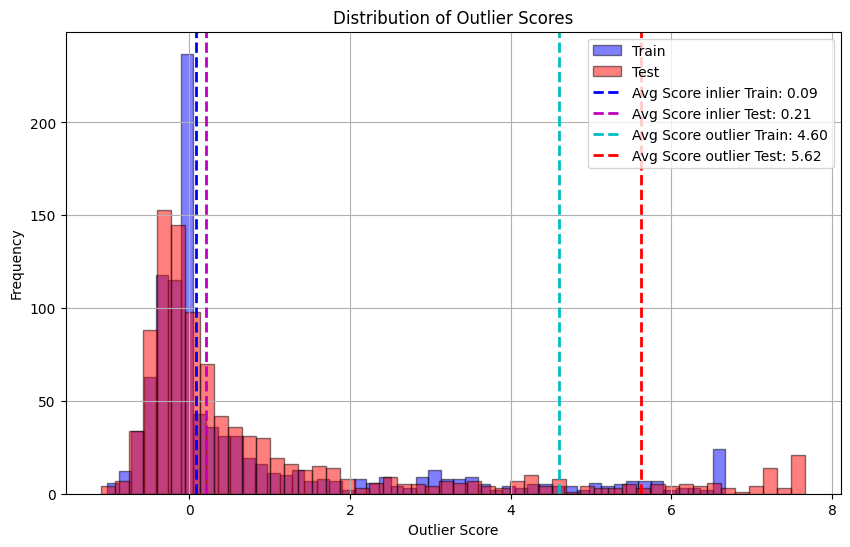

In [ ]:
import matplotlib.pyplot as plt

# Plotting the histogram of outlier scores for train and test sets
plt.figure(figsize=(10, 6))
plt.hist(scores_train, bins=50, alpha=0.5, color='blue', edgecolor='black', label='Train')
plt.hist(scores_test, bins=50, alpha=0.5, color='red', edgecolor='black', label='Test')

plt.axvline(average_score_inlier_train, color='b', linestyle='dashed', linewidth=2, label=f'Avg Score inlier Train: {average_score_inlier_train:.2f}')
plt.axvline(average_score_inlier_test, color='m', linestyle='dashed', linewidth=2, label=f'Avg Score inlier Test: {average_score_inlier_test:.2f}')

plt.axvline(average_score_outlier_train, color='c', linestyle='dashed', linewidth=2, label=f'Avg Score outlier Train: {average_score_outlier_train:.2f}')
plt.axvline(average_score_outlier_test, color='r', linestyle='dashed', linewidth=2, label=f'Avg Score outlier Test: {average_score_outlier_test:.2f}')

plt.title('Distribution of Outlier Scores')
plt.xlabel('Outlier Score')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [ ]:
from src.tasks.distribution_shift import distribution_shift_scoring
ks_score_train = distribution_shift_scoring(scores_train, train_scores_outliers, method='ks')
ks_score_test = distribution_shift_scoring(scores_train, test_scores_outliers, method='ks')

psi_score_train = distribution_shift_scoring(scores_train, train_scores_outliers, method='psi')
psi_score_test = distribution_shift_scoring(scores_train, test_scores_outliers, method='psi')

print(f'KS Score - Train: {ks_score_train:.2f}, Test: {ks_score_test:.2f}, (higher is more different)')
print(f'PSI Score - Train: {psi_score_train:.2f}, Test: {psi_score_test:.2f}, (higher is more different)')

2024-08-05 15:40:54,892 - src.config - DEBUG - calling distribution_shift_scoring
2024-08-05 15:40:54,893 - src.config - DEBUG - calling distribution_shift_scoring
2024-08-05 15:40:54,901 - src.config - DEBUG - calling distribution_shift_scoring
2024-08-05 15:40:54,901 - src.config - DEBUG - calling distribution_shift_scoring


KS Score - Train: 0.84, Test: 0.88, (higher is more different)
PSI Score - Train: 2.98, Test: 3.31, (higher is more different)
